In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import open3d as o3d
def gen_sign(pos_xy,s=True):
    pts = np.hstack((np.tile(pos_xy,(50,1)),np.linspace(-1,5,50).reshape(-1,1)))
    temp = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pts))
    if s:
        temp.paint_uniform_color([4/255.,186/255.,21/255.])
    else:
        temp.paint_uniform_color([240 / 255., 175 / 255., 247 / 255.])
    return temp

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


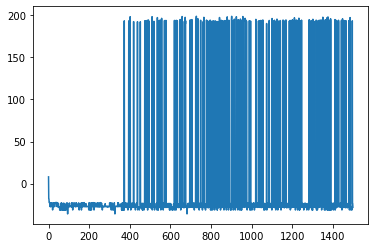

In [16]:
rwd=pd.read_csv(r"./rwdcsv/reward_list_0-9999_2.csv",sep=',',header=None).to_numpy().squeeze()[500:2000]
plt.plot(np.arange(rwd.shape[0]),rwd)

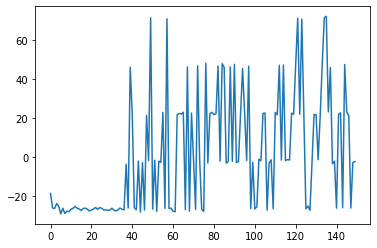

In [17]:
interval = 10
n= int(np.floor(rwd.shape[0]/interval))
avg = [np.mean(rwd[int(i)*interval:int(i+1)*interval-1]) for i in range(n)]
plt.plot(np.arange(n),avg
         )

In [11]:
t=o3d.io.read_point_cloud(r"E:\TD3_AVOIDANCE\pcd\rollout_21-02-07_03-14-08_pointcloud-unity.ply")
tree =  o3d.geometry.KDTreeFlann(t)
ret = tree.search_radius_vector_3d(np.array([10,20,1]),5)
local = o3d.geometry.PointCloud(
    o3d.utility.Vector3dVector(np.asarray(t.points)[ret[1]])
)
o3d.visualization.draw_geometries([local])

In [28]:
t=o3d.io.read_point_cloud(r"E:\TD3_AVOIDANCE\pcd\t3.ply")
o3d.visualization.draw_geometries([t,gen_sign(np.array([-4,14.5])),gen_sign(np.array([-11,7.5]))])

In [19]:
t=o3d.io.read_point_cloud(r"E:\TD3_AVOIDANCE\pcd\ply_get_tmp.ply")
v_t = o3d.geometry.VoxelGrid()
v_t=v_t.create_from_point_cloud(t,0.2)
o3d.visualization.draw_geometries([v_t])